In [9]:
# Code from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [10]:
# PID: Is Zenodo enough as a PID from an established community standard? Is Helmholtz RSD?
d_findable = ["Open Publication Repository", "Versioning", "PID", "Rich Metadata"]
heat_find =  [4, 1, 5, 2]
perun_find = [4, 2, 5, 2]

# Access conditions: Github handles this completly.
# Options: Github
# Pip and containers
d_accessible = ["Access Confitions", "Access Options", "Technical Accessibility"]
heat_acc = [5, 5, 5]
perun_acc = [5, 5, 5]

# Formats
# Both packages use accepted file formats, not sure about further tools for processing input/output data. Heat by definition? Not sure what level 5 means
# Adaptability
# There is a documented api, heat has containers and conda, perun does not. 
d_interoperable = ["Input/Output Formats", "Adaptability/Flexibility"]
heat_inter = [4, 5] 
perun_inter = [4, 4]

# Both only have a single, all encopassing license with no automation process behind
d_reusable = ["Reusability Conditions"]
heat_reuse = [2]
perun_reuse = [2]

# Community standarts
# I would argue that heat is in 4, as it is up to date with community standards (python,torch version, one api), but there is no close loop
# Expertiese:
# For heat, multiple teams on different locations, but mostly fixed?
# Scientific embeddign:
# Is a single publication as a documented use case?
# HIRSE probably qualifies, and soon/maybe the linux software foundation
d_science = ["Community Standards", "Team Expertise", "Scientific Embedding"]
heat_sci = [4, 4, 5]
perun_sci = [3, 2, 1]

# ProjectMng: Git and Github
# Structure: Contribuition file is important
# Security: Is github security reports (e.g. dependabot) enough for a 5. It does not block merges, it simply alerts. The team does not have a laid out process to handle it. 
d_tech = ["Project Managment", "Repo Structure", "Code structure", "Reproducibility", "Code changes", "Security"]
heat_tech = [5, 3, 5, 5, 4, 3]
perun_tech = [5, 2, 5, 4, 2, 3]

dims = ["Findable", "Accessible", "Interoperable", "Reusable", "Scientific basis", "Technical basis"]
heat_score = [sum(d) / (len(d) ) for d in [heat_find, heat_acc, heat_inter, heat_reuse, heat_sci, heat_tech]]
perun_score = [sum(d) / (len(d) ) for d in [perun_find, perun_acc, perun_inter, perun_reuse, perun_sci, perun_tech]]

heat_score

[3.0, 5.0, 4.5, 2.0, 4.333333333333333, 4.166666666666667]

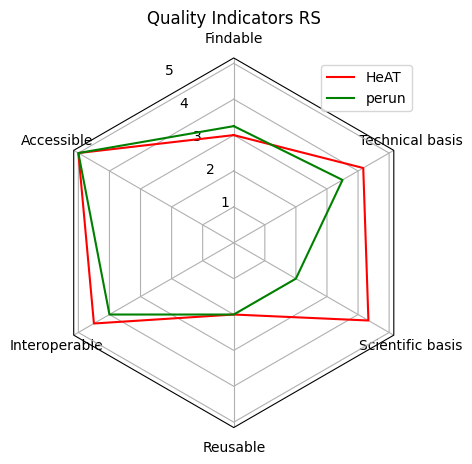

In [20]:
theta = radar_factory(6, frame='polygon')
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={"projection": 'radar'})
ax.set_title("Quality Indicators RS")
ax.plot(theta, heat_score, color='r', label="HeAT")
#ax.fill(theta, heat_score, facecolor='r', alpha=0.25)

ax.plot(theta, perun_score, color='g', label="perun")
#ax.fill(theta, perun_score, facecolor='g', alpha=0.25)

ax.set_varlabels(dims)
ax.legend()